In [13]:
!unzip /Faces.zip

unzip:  cannot find or open /Faces.zip, /Faces.zip.zip or /Faces.zip.ZIP.


In [14]:
import os
from tqdm import tqdm
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.decomposition import PCA

# Preparación de los datos

In [15]:
suffix = '.pgm'
facesPath = 'Faces' # use '/content/Faces' on colab

all_files = os.listdir(facesPath)
pgm_files = [filename for filename in all_files if filename.endswith(suffix)]

In [16]:
faces = []
for filename in tqdm(pgm_files):
  path = facesPath + '/' + filename
  with open(path, 'rb') as pgmf:
      image = plt.imread(pgmf)
  faces.append(image)

100%|██████████| 12833/12833 [00:02<00:00, 4972.76it/s]


In [17]:
faces = np.array(faces)
faces.shape

(12833, 64, 64)

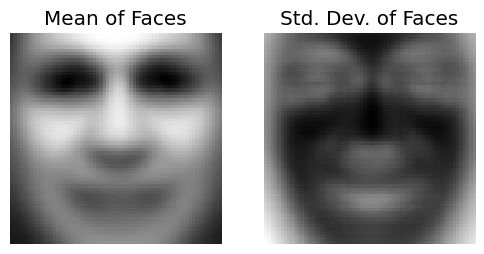

In [18]:
# Calculamos la imagen promedio y la desviación estándar para cada dígito
mean_images = np.mean(faces, axis=0)
std_images = np.std(faces, axis=0)

# Visualizamos las imágenes promedio y las desviaciones estándar
fig, axs = plt.subplots(1, 2, figsize=(6, 6))

axs[0].imshow(mean_images, cmap='gray')
axs[0].set_title(f"Mean of Faces")
axs[0].axis('off')

axs[1].imshow(std_images, cmap='gray')
axs[1].set_title(f"Std. Dev. of Faces")
axs[1].axis('off')

plt.show()

# PCA

In [19]:
X = np.array([im.flatten() for im in tqdm(faces, desc='Construyendo X')])

Construyendo X: 100%|██████████| 12833/12833 [00:00<00:00, 469800.41it/s]


In [20]:
X.shape

(12833, 4096)

In [21]:
# PCA
pca = PCA(n_components=200, whiten=False).fit(X)

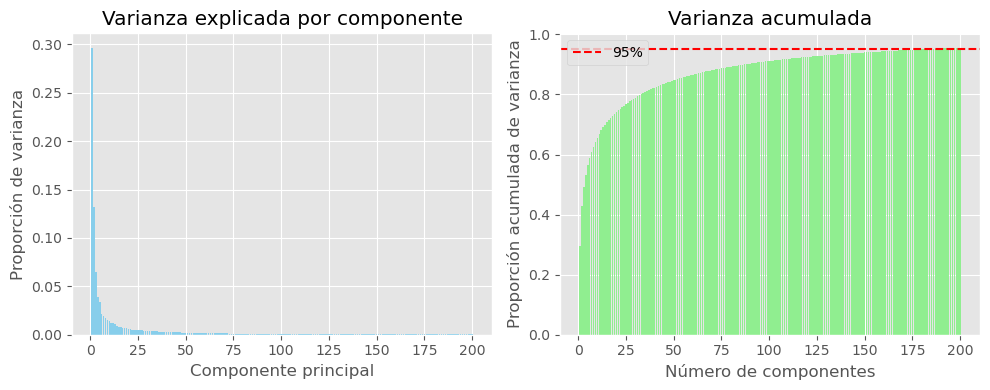

In [22]:
# Obtener varianzas
var_explicada = pca.explained_variance_ratio_
var_acumulada = np.cumsum(var_explicada)

# Gráfico
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Varianza explicada
ax1.bar(range(1, len(var_explicada)+1), var_explicada, color='skyblue')
ax1.set_title('Varianza explicada por componente')
ax1.set_xlabel('Componente principal')
ax1.set_ylabel('Proporción de varianza')
ax1.grid(True)

# Varianza acumulada
ax2.bar(range(1, len(var_acumulada)+1), var_acumulada, color='lightgreen')
ax2.axhline(y=0.95, color='r', linestyle='--', label='95%')
ax2.set_title('Varianza acumulada')
ax2.set_xlabel('Número de componentes')
ax2.set_ylabel('Proporción acumulada de varianza')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Visualización

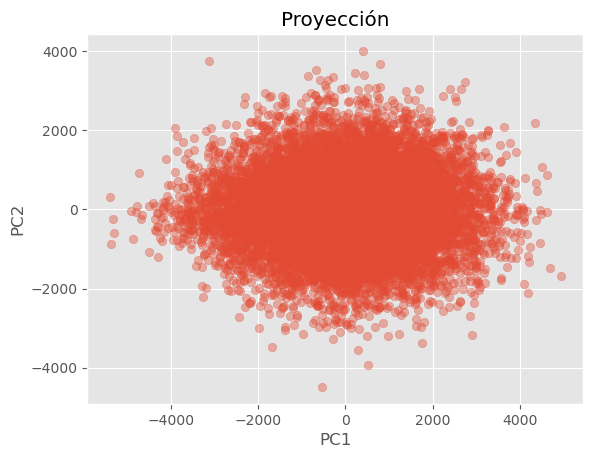

In [23]:
X_pca = pca.transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.4)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Proyección')
plt.show()

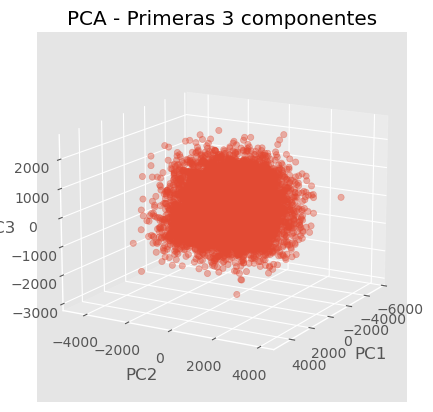

In [24]:
# Plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], alpha=0.4)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.view_init(elev=15, azim=30)

ax.set_title('PCA - Primeras 3 componentes')
plt.show()

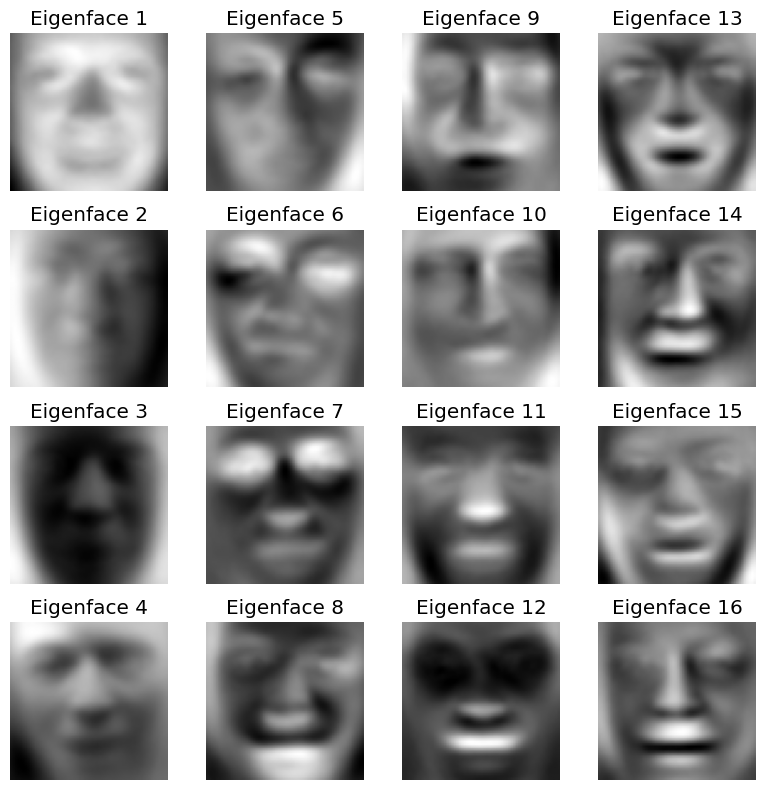

In [25]:
# Primeras K eigenfaces
K = 16
eigenfaces = pca.components_[:K]
faceshape = faces[0].shape
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,8))
for i in range(K):
    axes[i%4][i//4].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
    axes[i%4][i//4].set_title(f"Eigenface {i+1}")
    axes[i%4][i//4].axis('off')

plt.tight_layout()
plt.show()

In [26]:
df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199,PC200
0,1977.601434,-395.786673,-156.604000,-419.611281,490.562818,-246.588977,110.561225,214.333453,-93.028596,77.392999,...,32.654249,50.636030,23.587670,77.410574,15.673565,-21.143003,-8.524490,-5.812606,-8.204586,-0.343911
1,-714.628847,-505.392158,-442.767159,-445.964670,-50.775576,222.792390,561.896480,-116.964168,242.054975,-38.537598,...,8.688437,-0.129143,44.065014,-3.982648,-44.267023,19.091620,71.748426,14.025294,6.745647,36.611580
2,394.003859,-818.037631,482.951634,395.237403,-558.758752,-300.836736,-14.837579,-432.270093,-194.730170,241.558682,...,134.679492,12.992484,-46.308651,-63.533424,-10.802934,43.784906,42.673824,12.739496,72.754795,-44.764173
3,580.945732,-1816.984716,-311.975131,-562.541639,-358.632883,-193.040274,-56.764652,90.904687,-352.091894,-107.997218,...,1.556033,20.880907,75.249327,-124.946469,-54.267510,48.066507,49.430883,-40.147149,-75.109107,94.685779
4,-1731.064046,-249.332923,-568.437927,-252.072310,107.315962,-68.659710,178.531664,384.127109,-314.380717,721.641281,...,40.778489,52.673496,1.426284,21.914729,68.884083,-72.886343,16.256305,-32.220674,-71.720550,26.930021


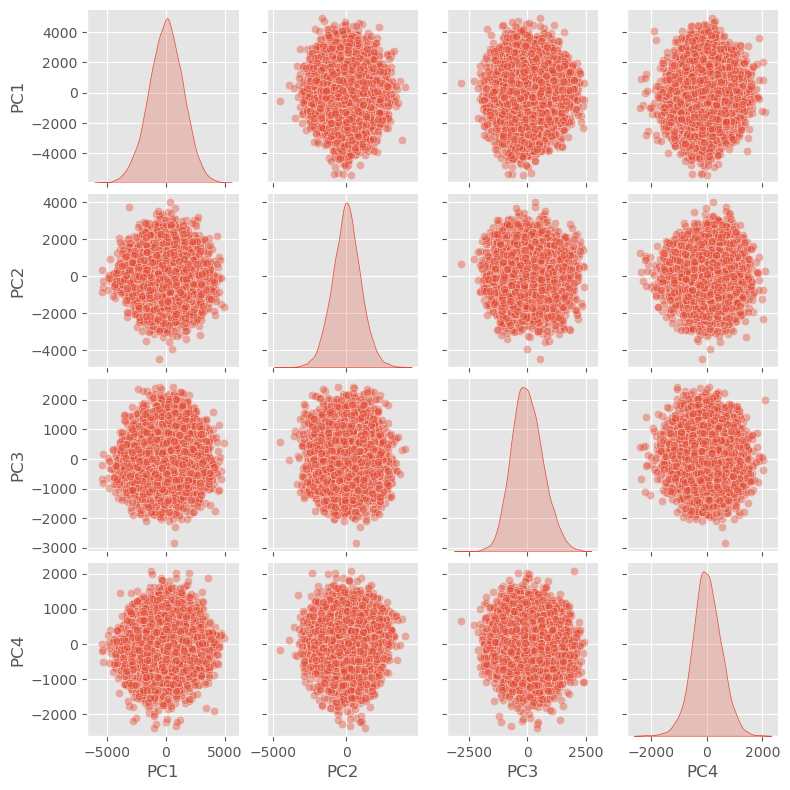

In [27]:
sns.pairplot(df[['PC1','PC2','PC3','PC4']], diag_kind='kde',height=2,plot_kws={'alpha':0.4})
plt.show()

# Reconstrucción

In [28]:
idx = 2050  # Índice de la imagen a reconstruir
original = X[idx]
pc_scores = X_pca[idx]

In [29]:
reconstructed_images = []
components_used = [10, 50, 100, 200]

for k in components_used:
    reconstruction = np.dot(pc_scores[:k], pca.components_[:k]) + pca.mean_
    reconstructed_images.append(reconstruction.reshape(faceshape))

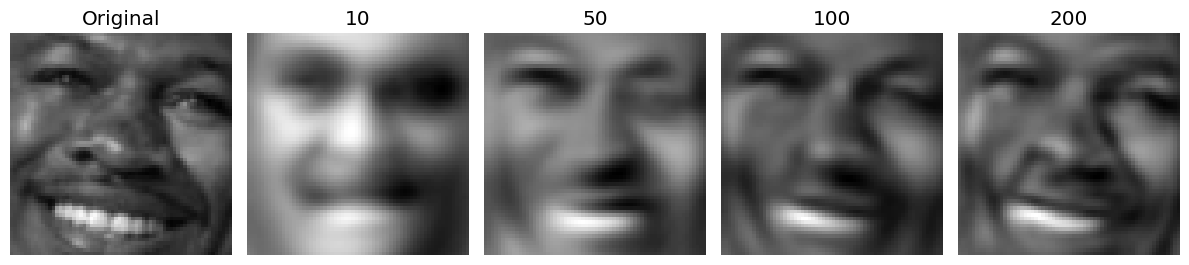

In [30]:
# Visualización
fig, axes = plt.subplots(1, len(components_used) + 1, figsize=(12, 4))

# Imagen original
axes[0].imshow(original.reshape(faceshape), cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

# Reconstrucciones
for i, img in enumerate(reconstructed_images):
    axes[i+1].imshow(img, cmap='gray')
    axes[i+1].set_title(f"{components_used[i]}")
    axes[i+1].axis('off')

plt.tight_layout()
plt.show()